In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from skimage import filters

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.png'):  # Adjust if your images are in another format
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            images.append(img)
    return images

In [3]:
def create_heat_map(images):
    intensity_histogram = np.zeros((256, 256))  # Assuming 8-bit grayscale (0-255)

    for img in images:
        # Ensure the image is a NumPy array
        img_array = np.array(img)
        
        # Flatten the image and calculate histogram
        hist, xedges, yedges = np.histogram2d(img_array.flatten(), img_array.flatten(), bins=256, range=[[0, 255], [0, 255]])
        intensity_histogram += hist

    plt.imshow(intensity_histogram, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Heat Map of Image Intensities')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')
    plt.show()

In [4]:
def plot_image_dimensions(image_info):
    widths = [info[0][0] for info in image_info]
    heights = [info[0][1] for info in image_info]

    plt.figure(figsize=(12, 6))

    # Plot for widths
    plt.subplot(1, 2, 1)
    ax1 = sns.histplot(widths, bins=20, color='blue', kde=False)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')

    # Annotate counts above bars for widths
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Plot for heights
    plt.subplot(1, 2, 2)
    ax2 = sns.histplot(heights, bins=20, color='green', kde=False)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')

    # Annotate counts above bars for heights
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

In [5]:
folder_path = 'data/Open-Eyes/train'  
images = load_images_from_folder(folder_path)
image_info = [(img.size, np.array(img).shape) for img in images]
print(image_info)  # This will print the size (width, height) and shape of each image array

[((82, 82), (82, 82)), ((81, 81), (81, 81)), ((85, 85), (85, 85)), ((81, 81), (81, 81)), ((78, 78), (78, 78)), ((86, 86), (86, 86)), ((79, 79), (79, 79)), ((87, 87), (87, 87)), ((82, 82), (82, 82)), ((85, 85), (85, 85)), ((80, 80), (80, 80)), ((86, 86), (86, 86)), ((79, 79), (79, 79)), ((83, 83), (83, 83)), ((82, 82), (82, 82)), ((82, 82), (82, 82)), ((86, 86), (86, 86)), ((83, 83), (83, 83)), ((83, 83), (83, 83)), ((80, 80), (80, 80)), ((82, 82), (82, 82)), ((82, 82), (82, 82)), ((84, 84), (84, 84)), ((81, 81), (81, 81)), ((84, 84), (84, 84)), ((81, 81), (81, 81)), ((83, 83), (83, 83)), ((78, 78), (78, 78)), ((84, 84), (84, 84)), ((83, 83), (83, 83)), ((87, 87), (87, 87)), ((79, 79), (79, 79)), ((84, 84), (84, 84)), ((80, 80), (80, 80)), ((84, 84), (84, 84)), ((80, 80), (80, 80)), ((84, 84), (84, 84)), ((81, 81), (81, 81)), ((83, 83), (83, 83)), ((80, 80), (80, 80)), ((85, 85), (85, 85)), ((84, 84), (84, 84)), ((83, 83), (83, 83)), ((87, 87), (87, 87)), ((82, 82), (82, 82)), ((81, 81)

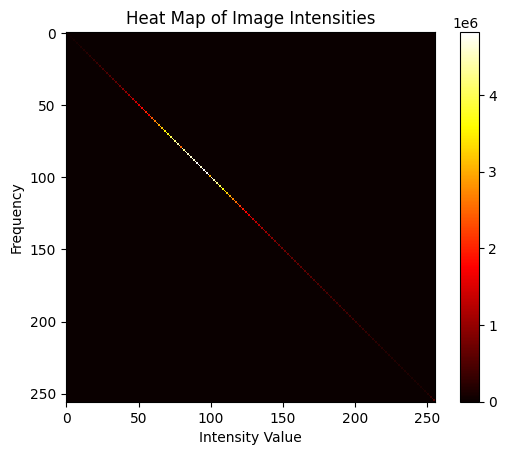

In [6]:
create_heat_map(images)

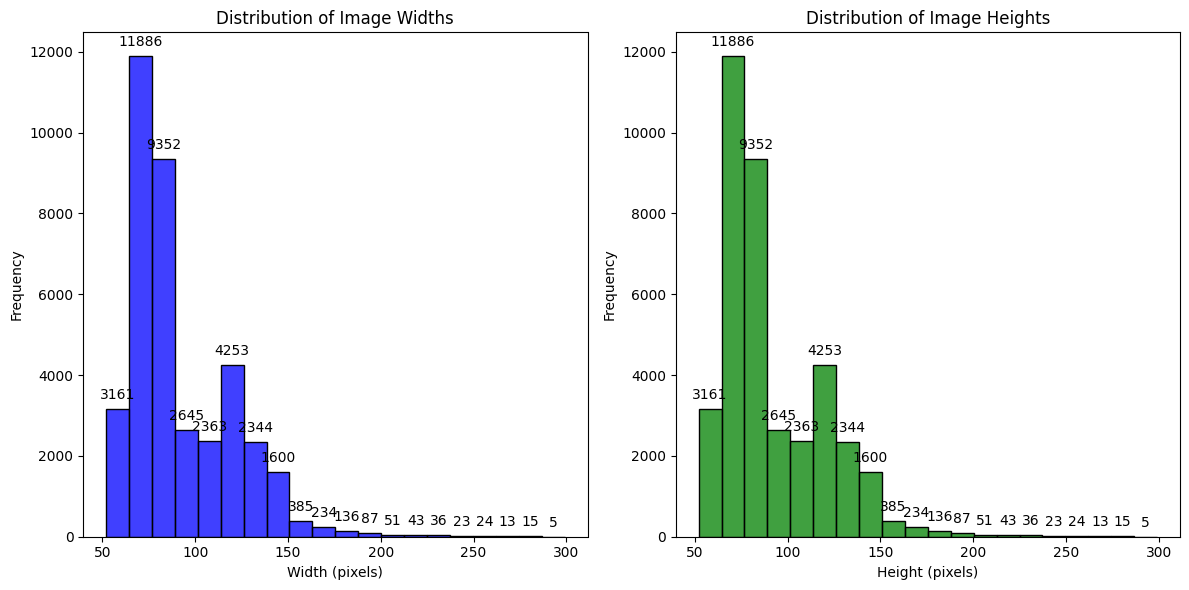

In [7]:
plot_image_dimensions(image_info)

In [8]:
folder_path = 'data/Open-Eyes/test'  
images = load_images_from_folder(folder_path)
image_info = [(img.size, np.array(img).shape) for img in images]
print(image_info)  # This will print the size (width, height) and shape of each image array

[((84, 84), (84, 84)), ((78, 78), (78, 78)), ((81, 81), (81, 81)), ((85, 85), (85, 85)), ((86, 86), (86, 86)), ((84, 84), (84, 84)), ((84, 84), (84, 84)), ((83, 83), (83, 83)), ((81, 81), (81, 81)), ((83, 83), (83, 83)), ((89, 89), (89, 89)), ((84, 84), (84, 84)), ((84, 84), (84, 84)), ((82, 82), (82, 82)), ((82, 82), (82, 82)), ((78, 78), (78, 78)), ((85, 85), (85, 85)), ((85, 85), (85, 85)), ((87, 87), (87, 87)), ((82, 82), (82, 82)), ((83, 83), (83, 83)), ((81, 81), (81, 81)), ((84, 84), (84, 84)), ((87, 87), (87, 87)), ((84, 84), (84, 84)), ((80, 80), (80, 80)), ((90, 90), (90, 90)), ((83, 83), (83, 83)), ((81, 81), (81, 81)), ((81, 81), (81, 81)), ((79, 79), (79, 79)), ((80, 80), (80, 80)), ((83, 83), (83, 83)), ((82, 82), (82, 82)), ((86, 86), (86, 86)), ((79, 79), (79, 79)), ((86, 86), (86, 86)), ((84, 84), (84, 84)), ((85, 85), (85, 85)), ((79, 79), (79, 79)), ((78, 78), (78, 78)), ((80, 80), (80, 80)), ((91, 91), (91, 91)), ((81, 81), (81, 81)), ((90, 90), (90, 90)), ((80, 80)

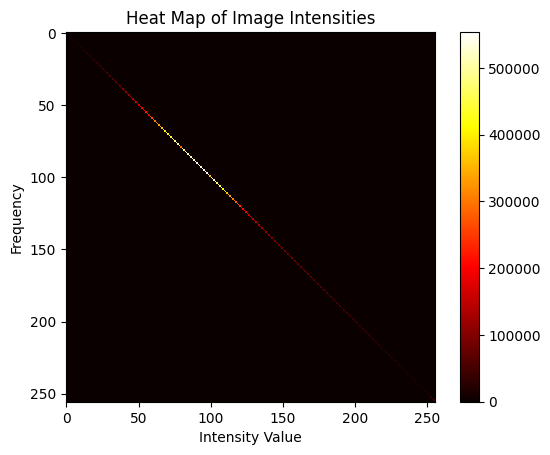

In [9]:
create_heat_map(images)

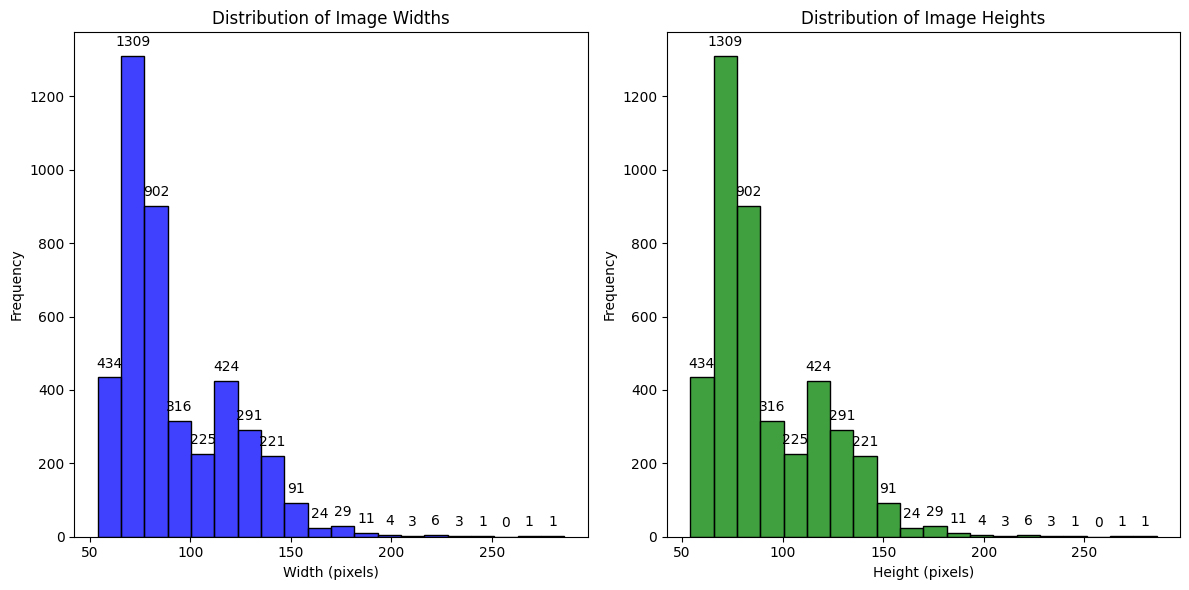

In [10]:
plot_image_dimensions(image_info)

In [11]:
folder_path = 'data/Close-Eyes/train'  
images = load_images_from_folder(folder_path)
image_info = [(img.size, np.array(img).shape) for img in images]
print(image_info)  # This will print the size (width, height) and shape of each image array

[((86, 86), (86, 86)), ((84, 84), (84, 84)), ((81, 81), (81, 81)), ((78, 78), (78, 78)), ((81, 81), (81, 81)), ((81, 81), (81, 81)), ((82, 82), (82, 82)), ((90, 90), (90, 90)), ((106, 106), (106, 106)), ((83, 83), (83, 83)), ((80, 80), (80, 80)), ((84, 84), (84, 84)), ((84, 84), (84, 84)), ((87, 87), (87, 87)), ((97, 97), (97, 97)), ((76, 76), (76, 76)), ((97, 97), (97, 97)), ((96, 96), (96, 96)), ((77, 77), (77, 77)), ((91, 91), (91, 91)), ((80, 80), (80, 80)), ((83, 83), (83, 83)), ((89, 89), (89, 89)), ((87, 87), (87, 87)), ((84, 84), (84, 84)), ((88, 88), (88, 88)), ((84, 84), (84, 84)), ((90, 90), (90, 90)), ((80, 80), (80, 80)), ((91, 91), (91, 91)), ((82, 82), (82, 82)), ((94, 94), (94, 94)), ((80, 80), (80, 80)), ((97, 97), (97, 97)), ((81, 81), (81, 81)), ((100, 100), (100, 100)), ((78, 78), (78, 78)), ((95, 95), (95, 95)), ((78, 78), (78, 78)), ((101, 101), (101, 101)), ((77, 77), (77, 77)), ((89, 89), (89, 89)), ((101, 101), (101, 101)), ((77, 77), (77, 77)), ((75, 75), (75,

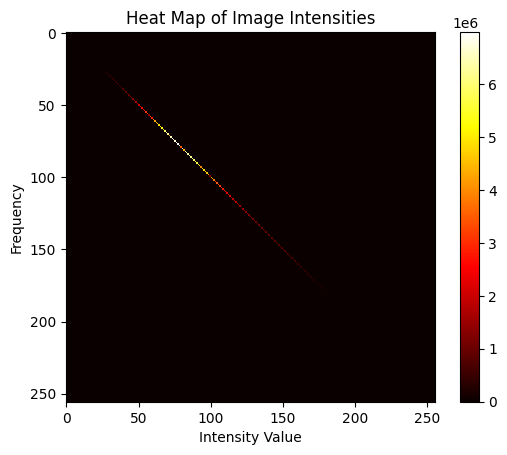

In [12]:
create_heat_map(images)

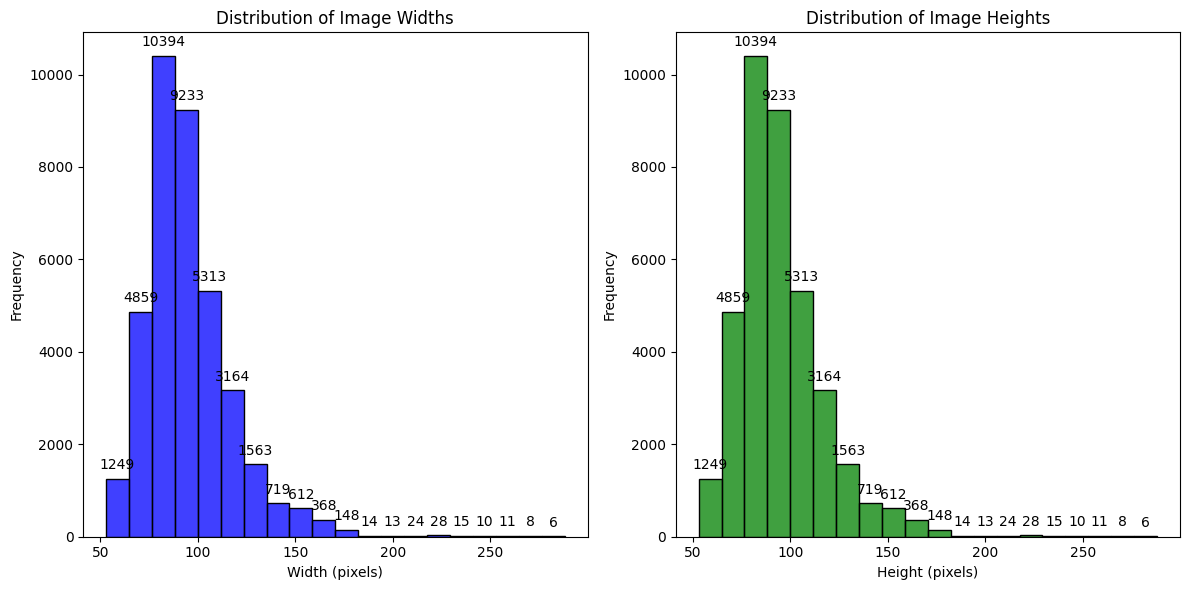

In [13]:
plot_image_dimensions(image_info)

In [14]:
folder_path = 'data/Close-Eyes/test'  
images = load_images_from_folder(folder_path)
image_info = [(img.size, np.array(img).shape) for img in images]
print(image_info)  # This will print the size (width, height) and shape of each image array

[((82, 82), (82, 82)), ((89, 89), (89, 89)), ((82, 82), (82, 82)), ((85, 85), (85, 85)), ((102, 102), (102, 102)), ((105, 105), (105, 105)), ((79, 79), (79, 79)), ((75, 75), (75, 75)), ((100, 100), (100, 100)), ((77, 77), (77, 77)), ((98, 98), (98, 98)), ((74, 74), (74, 74)), ((77, 77), (77, 77)), ((105, 105), (105, 105)), ((87, 87), (87, 87)), ((83, 83), (83, 83)), ((101, 101), (101, 101)), ((87, 87), (87, 87)), ((98, 98), (98, 98)), ((93, 93), (93, 93)), ((98, 98), (98, 98)), ((87, 87), (87, 87)), ((78, 78), (78, 78)), ((82, 82), (82, 82)), ((83, 83), (83, 83)), ((82, 82), (82, 82)), ((86, 86), (86, 86)), ((90, 90), (90, 90)), ((84, 84), (84, 84)), ((90, 90), (90, 90)), ((95, 95), (95, 95)), ((95, 95), (95, 95)), ((92, 92), (92, 92)), ((93, 93), (93, 93)), ((80, 80), (80, 80)), ((80, 80), (80, 80)), ((107, 107), (107, 107)), ((109, 109), (109, 109)), ((77, 77), (77, 77)), ((85, 85), (85, 85)), ((101, 101), (101, 101)), ((85, 85), (85, 85)), ((83, 83), (83, 83)), ((82, 82), (82, 82)),

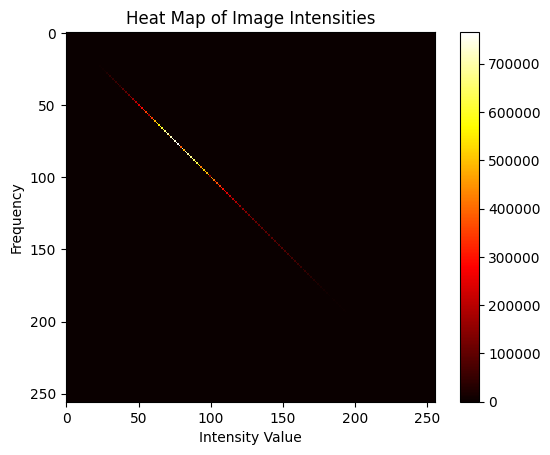

In [15]:
create_heat_map(images)

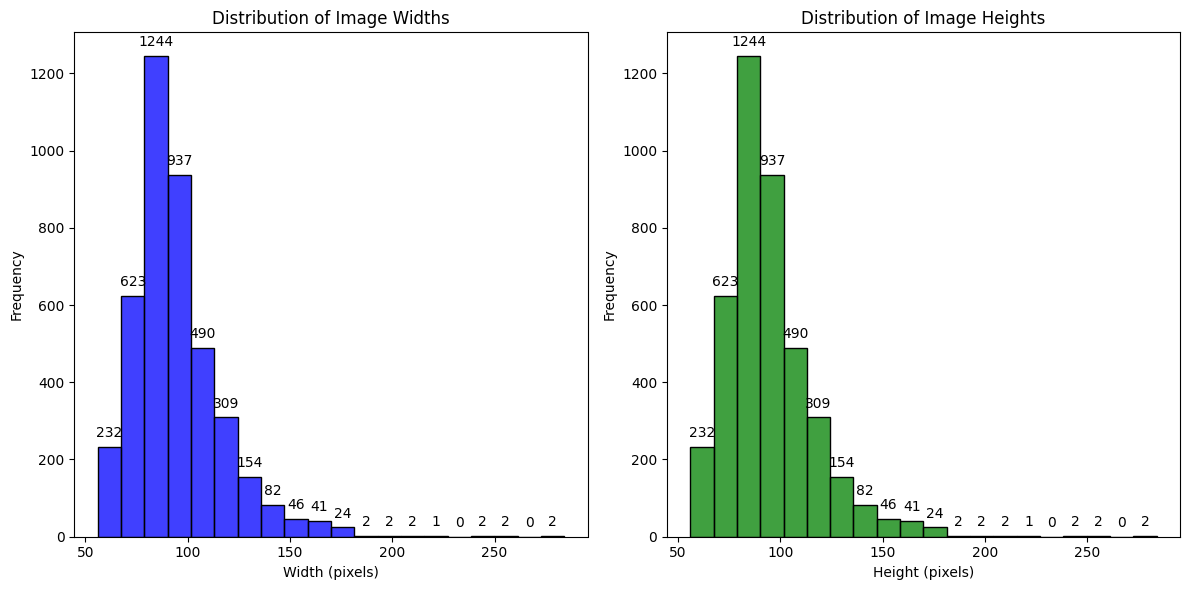

In [16]:
plot_image_dimensions(image_info)